In [ ]:
!pip install ucimlrepo
!pip install scikit-learn

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, median_absolute_error
from sklearn.ensemble import RandomForestRegressor
from ucimlrepo import fetch_ucirepo


In [ ]:
# Descarga del dataset
wine_quality = fetch_ucirepo(id=186)
# Datos brutos en formato Dataframe de pandas
X = wine_quality.data.features
y = wine_quality.data.targets

y = y.values.flatten()

In [ ]:
# Dividir los datos en entrenamiento y prueba
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Escalar los datos
scaler = StandardScaler()
X_train_reg = scaler.fit_transform(X_train_reg)
X_test_reg = scaler.transform(X_test_reg)

In [ ]:
# Crear el modelo de Random Forest
regressor= RandomForestRegressor(
    n_estimators=50,  # Número de árboles en el bosque
    max_depth=20,      # Profundidad máxima del árbol
    min_samples_split=5,  # Mínimo de muestras para dividir un nodo
    min_samples_leaf=2,   # Mínimo de muestras en una hoja final
    random_state=42,
     max_features='log2'
)

# Entrenar el modelo
regressor.fit(X_train_reg, y_train_reg)

# Realizar las predicciones
y_pred_reg = regressor.predict(X_test_reg)

In [ ]:
# Cálculo de métricas
mae = mean_absolute_error(y_test_reg, y_pred_reg)
mse = mean_squared_error(y_test_reg, y_pred_reg)
rmse = mean_squared_error(y_test_reg, y_pred_reg)**0.5  # Raíz cuadrada del MSE
r2 = r2_score(y_test_reg, y_pred_reg)
medae = median_absolute_error(y_test_reg, y_pred_reg)


# Asegúrate de que no haya ceros en y_test_reg al calcular el MAPE
y_test_reg = y_test_reg.ravel()  # Convertir a array unidimensional
y_pred_reg = y_pred_reg.ravel()  # Convertir a array unidimensional
mape = (abs((y_test_reg - y_pred_reg) / y_test_reg)).mean() * 100  # Evita si hay valores cercanos a 0
correlation = np.corrcoef(y_test_reg, y_pred_reg)[0, 1]
# Impresión de resultados
print(f"Regresión - MAE: {mae}")
print(f"Regresión - MSE: {mse}")
print(f"Regresión - RMSE: {rmse}")
print(f"Regresión - R²: {r2}")
print(f"Regresión - MedAE: {medae}")
print(f"Regresión - MAPE: {mape}%")
print(f"Regresión - Correlación de Pearson: {correlation}")

Regresión - MAE: 0.45603133979841126
Regresión - MSE: 0.3811055064291932
Regresión - RMSE: 0.6173374331993754
Regresión - R²: 0.4839791675757472
Regresión - MedAE: 0.3452656608097784
Regresión - MAPE: 8.1891685446526%
Regresión - Correlación de Pearson: 0.6978910896106157


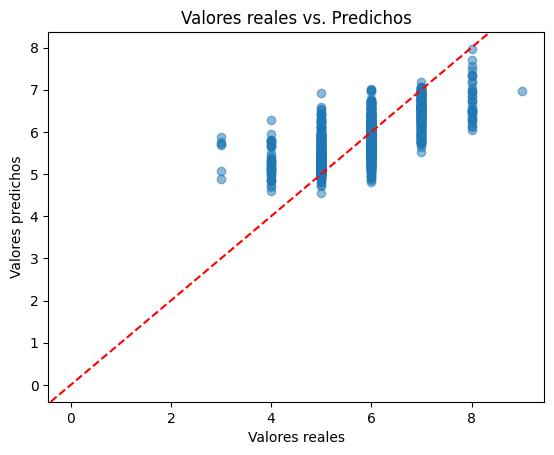

In [ ]:
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.xlabel("Valores reales")
plt.ylabel("Valores predichos")
plt.title("Valores reales vs. Predichos")
plt.axline([0, 0], [1, 1], color="red", linestyle="--")  # Línea ideal
plt.show()

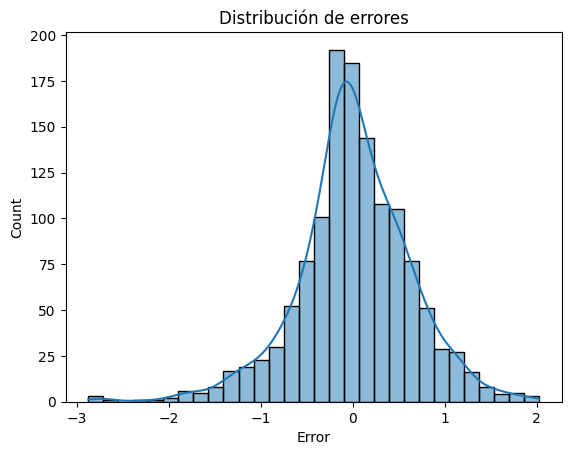

In [ ]:
errors = y_test_reg - y_pred_reg
sns.histplot(errors, bins=30, kde=True)
plt.xlabel("Error")
plt.title("Distribución de errores")
plt.show()


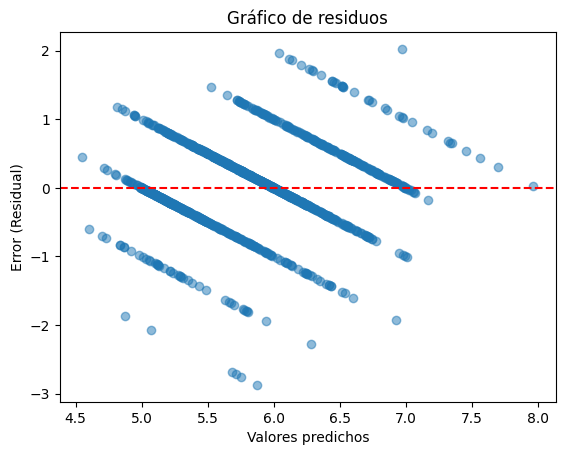

In [ ]:
plt.scatter(y_pred_reg, errors, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Valores predichos")
plt.ylabel("Error (Residual)")
plt.title("Gráfico de residuos")
plt.show()